In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as m
import seaborn as s
%matplotlib inline

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  confusion_matrix, classification_report, accuracy_score, log_loss

In [3]:
s.set_style("darkgrid")
m.rcParams['font.size'] = 14
m.rcParams['figure.figsize'] = (9, 5)
m.rcParams['figure.facecolor'] = '#00000000'

In [5]:
train_raw = pd.read_csv(r'C:\Users\ST-0010\Music\VIT CHENNAI\EMPLOYEE STRESS\DATASET\EMPLOYEE STRESS.csv', delimiter = ';')
train_raw

,EmployeeID,Target,Age,AvgDailyHours,Department,Education,EducationField,Gender,HasFlexibleTimings,IsIndividualContributor,...,RelationshipSatisfaction,RemoteWorkSatistfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,WorkLoadLevel,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,100001,0,36.0,6.45,Sales,5,Technical Degree,Male,No,Yes,...,1,Medium,3,8.0,2,2,Low,8.0,1.0,8.0
1,100002,0,24.0,8.48,Sales,5,Technical Degree,Male,No,Yes,...,1,Very High,2,1.0,5,2,High,0.0,0.0,0.0
2,100003,0,45.0,6.93,Research & Development,2,Technical Degree,Female,No,Yes,...,4,High,1,17.0,6,4,Low,17.0,4.0,10.0
3,100004,1,29.0,7.10,Sales,4,Medical,Male,No,No,...,4,Medium,2,2.0,0,2,NaN,1.0,1.0,1.0
4,100005,0,30.0,7.30,Human Resources,3,Life Sciences,Female,No,Yes,...,1,Very High,4,9.0,6,1,Medium,3.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,115996,0,19.0,6.81,Sales,2,Other,Male,Yes,Yes,...,3,High,2,0.0,3,1,NaN,0.0,0.0,0.0
15996,115997,0,56.0,7.60,Sales,2,Technical Degree,Female,No,No,...,2,Low,2,7.0,2,1,Medium,6.0,2.0,2.0
15997,115998,0,26.0,6.52,Human Resources,1,Other,Female,No,Yes,...,3,High,4,5.0,3,4,High,1.0,1.0,1.0
15998,115999,0,29.0,6.11,Research & Development,4,Human Resources,Female,Yes,No,...,1,High,2,6.0,3,1,High,1.0,1.0,1.0


In [7]:
train_raw[(train_raw.PerformanceRating == np.int64(4))].JobSatisfaction.value_counts()

JobSatisfaction
4    1009
1    1006
2     984
3     961
Name: count, dtype: int64

In [8]:
train_raw.columns

Index(['EmployeeID', 'Target', 'Age', 'AvgDailyHours', 'Department',
       'Education', 'EducationField', 'Gender', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'LeavesTaken', 'MaritalStatus', 'MicromanagedAtWork',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction',
       'RemoteWorkSatistfaction', 'SelfMotivationLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'WorkLoadLevel',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: >

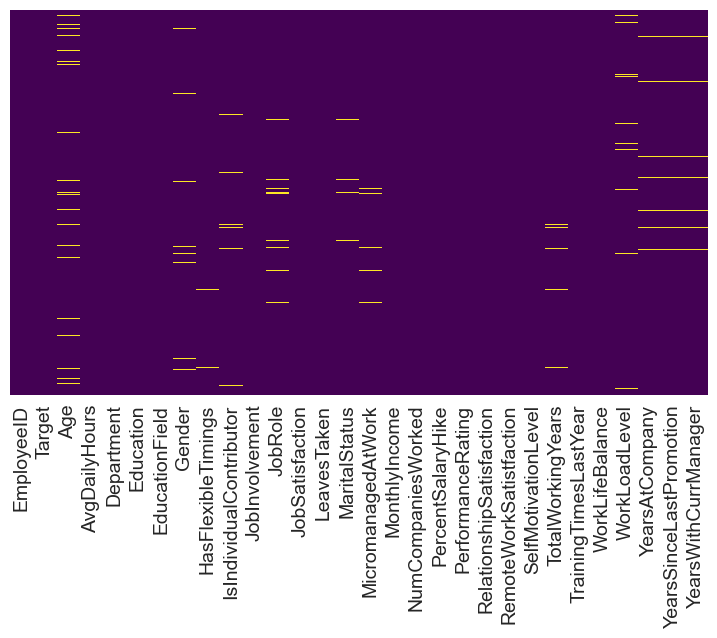

In [9]:
s.heatmap(train_raw.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
train_raw.isnull().sum(axis=0)

EmployeeID                    0
Target                        0
Age                         607
AvgDailyHours                 0
Department                    0
Education                     0
EducationField                0
Gender                      348
HasFlexibleTimings          169
IsIndividualContributor     325
JobInvolvement                0
JobRole                     370
JobSatisfaction               0
LeavesTaken                  49
MaritalStatus               234
MicromanagedAtWork          138
MonthlyIncome                 0
NumCompaniesWorked            0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
RemoteWorkSatistfaction       0
SelfMotivationLevel           0
TotalWorkingYears           333
TrainingTimesLastYear         0
WorkLifeBalance               0
WorkLoadLevel               413
YearsAtCompany              333
YearsSinceLastPromotion     333
YearsWithCurrManager        333
dtype: int64

In [11]:
train_raw.describe()

,EmployeeID,Target,Age,AvgDailyHours,Education,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,SelfMotivationLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,16000.000000,16000.000000,15393.000000,16000.000000,16000.000000,16000.000000,16000.000000,15951.000000,15862.000000,1.600000e+04,...,16000.000000,16000.000000,16000.000000,16000.000000,15667.000000,16000.000000,16000.000000,15667.000000,15667.000000,15667.000000
mean,108000.500000,0.176250,38.966413,7.768878,3.001313,2.509063,2.494937,10.914175,3.001954,2.280443e+05,...,16.003000,2.493875,2.494687,2.488000,9.205464,3.004313,2.499125,4.557669,1.785792,2.017872
std,4618.946489,0.381045,12.365318,1.827135,1.410916,1.122329,1.116211,6.449444,1.413566,6.733454e+05,...,5.488681,1.116934,1.118559,1.118228,8.885191,2.003352,1.113026,5.864989,1.695834,2.441463
min,100001.000000,0.000000,18.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.017000e+03,...,7.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,104000.750000,0.000000,28.000000,6.660000,2.000000,2.000000,1.000000,6.000000,2.000000,3.333300e+04,...,11.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000
50%,108000.500000,0.000000,39.000000,7.400000,3.000000,3.000000,2.000000,9.000000,3.000000,1.250000e+05,...,16.000000,2.000000,2.000000,2.000000,6.000000,3.000000,2.000000,2.000000,1.000000,1.000000
75%,112000.250000,0.000000,50.000000,8.490000,4.000000,4.000000,3.000000,15.000000,4.000000,2.416670e+05,...,21.000000,3.000000,3.000000,3.000000,15.000000,5.000000,3.000000,7.000000,3.000000,3.000000
max,116000.000000,1.000000,60.000000,18.340000,5.000000,4.000000,4.000000,30.000000,5.000000,7.916670e+06,...,25.000000,4.000000,4.000000,4.000000,39.000000,6.000000,4.000000,38.000000,5.000000,10.000000


In [12]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                16000 non-null  int64  
 1   Target                    16000 non-null  int64  
 2   Age                       15393 non-null  float64
 3   AvgDailyHours             16000 non-null  float64
 4   Department                16000 non-null  object 
 5   Education                 16000 non-null  int64  
 6   EducationField            16000 non-null  object 
 7   Gender                    15652 non-null  object 
 8   HasFlexibleTimings        15831 non-null  object 
 9   IsIndividualContributor   15675 non-null  object 
 10  JobInvolvement            16000 non-null  int64  
 11  JobRole                   15630 non-null  object 
 12  JobSatisfaction           16000 non-null  int64  
 13  LeavesTaken               15951 non-null  float64
 14  Marita

In [13]:
df = train_raw.dropna()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13554 entries, 0 to 15999
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeID                13554 non-null  int64  
 1   Target                    13554 non-null  int64  
 2   Age                       13554 non-null  float64
 3   AvgDailyHours             13554 non-null  float64
 4   Department                13554 non-null  object 
 5   Education                 13554 non-null  int64  
 6   EducationField            13554 non-null  object 
 7   Gender                    13554 non-null  object 
 8   HasFlexibleTimings        13554 non-null  object 
 9   IsIndividualContributor   13554 non-null  object 
 10  JobInvolvement            13554 non-null  int64  
 11  JobRole                   13554 non-null  object 
 12  JobSatisfaction           13554 non-null  int64  
 13  LeavesTaken               13554 non-null  float64
 14  MaritalStat

## Visualizing data for a better insight 

<Axes: title={'center': 'Number of Employees under Stress'}, xlabel='Target', ylabel='count'>

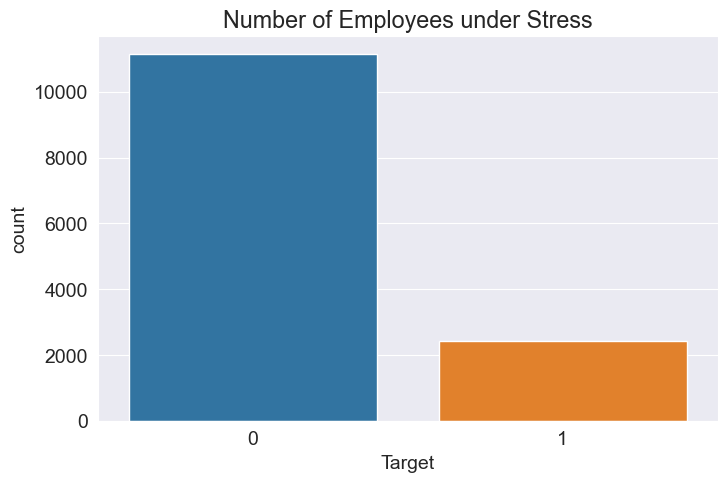

In [15]:
m.figure(figsize=(8,5))
m.title('Number of Employees under Stress')
s.countplot(x = df.Target)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

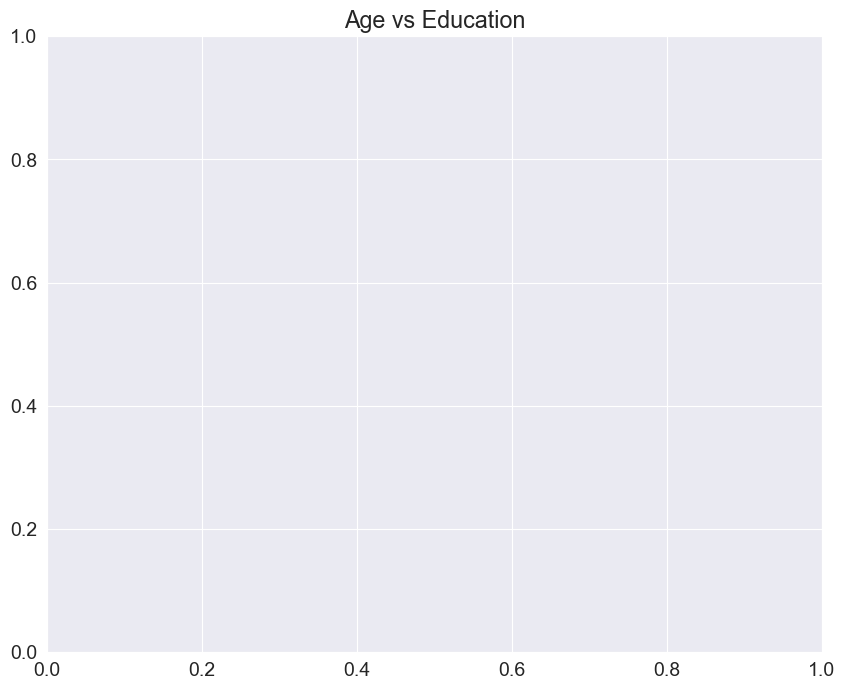

In [16]:
m.figure(figsize=(10,8))
m.title('Age vs Education')

s.boxplot(train_raw.Education, train_raw.Age, hue=train_raw.Target)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

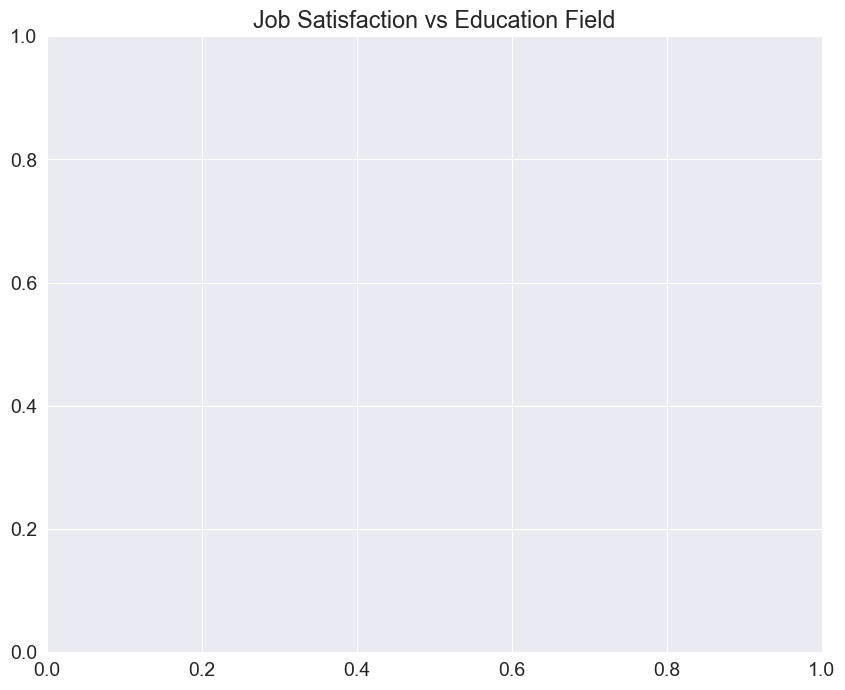

In [17]:
m.figure(figsize=(10,8))
m.title('Job Satisfaction vs Education Field')
s.boxplot(train_raw.EducationField, train_raw.JobSatisfaction, hue=train_raw.Target)

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

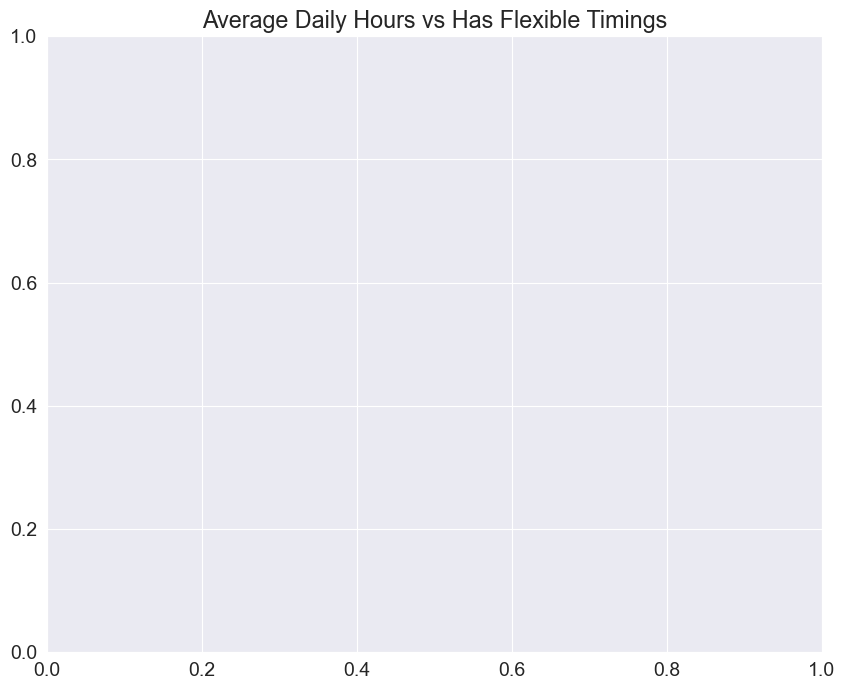

In [18]:
m.figure(figsize=(10,8))
m.title('Average Daily Hours vs Has Flexible Timings')
s.boxplot(train_raw.HasFlexibleTimings, train_raw.AvgDailyHours, hue=train_raw.Target)

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\3581675160.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['JobSatisfaction'])


<Axes: xlabel='JobSatisfaction', ylabel='Density'>

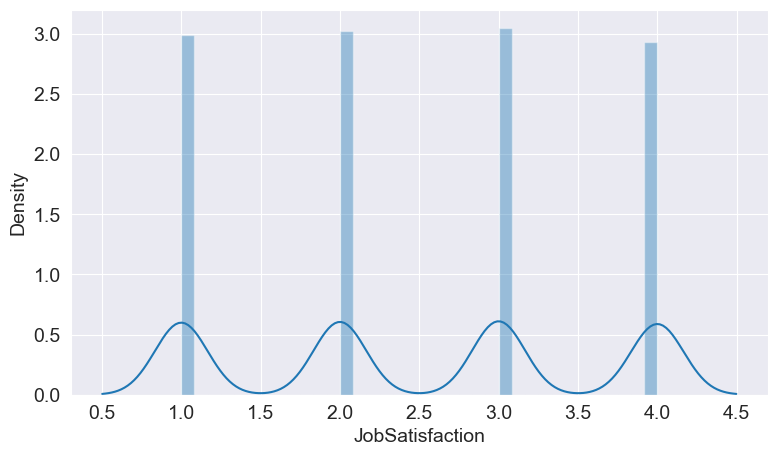

In [19]:
s.distplot(df['JobSatisfaction'])

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\1969045461.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['Education'])


<Axes: xlabel='Education', ylabel='Density'>

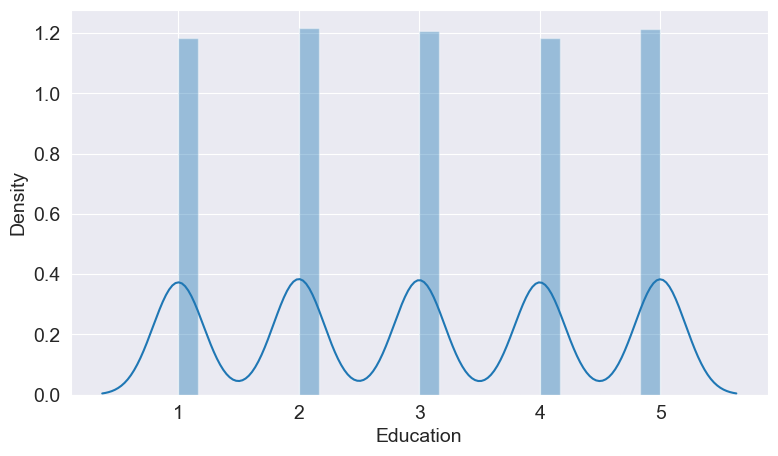

In [20]:
s.distplot(df['Education'])

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\2347887301.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

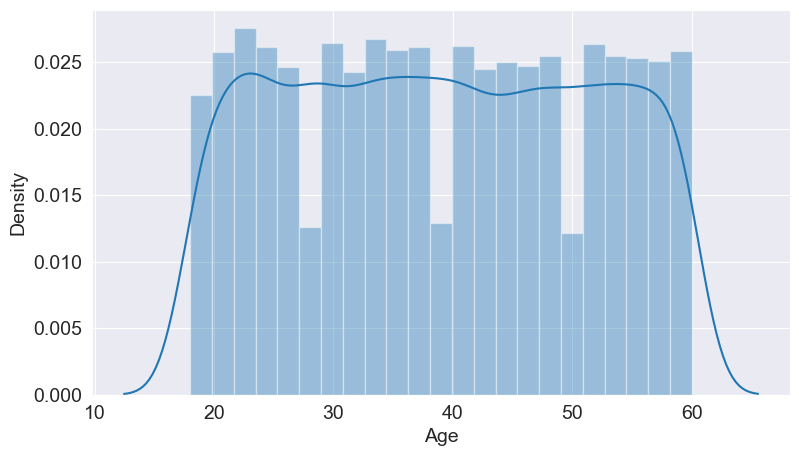

In [21]:
s.distplot(df['Age'])

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\558799400.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsAtCompany'])


<Axes: xlabel='YearsAtCompany', ylabel='Density'>

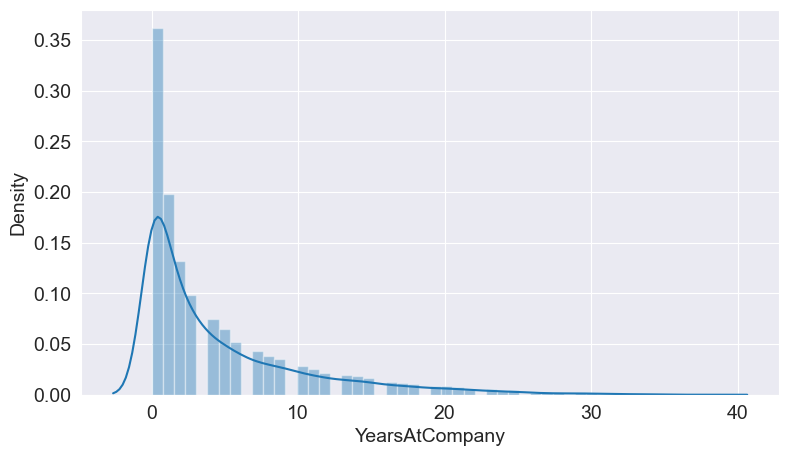

In [22]:
s.distplot(df['YearsAtCompany'])

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

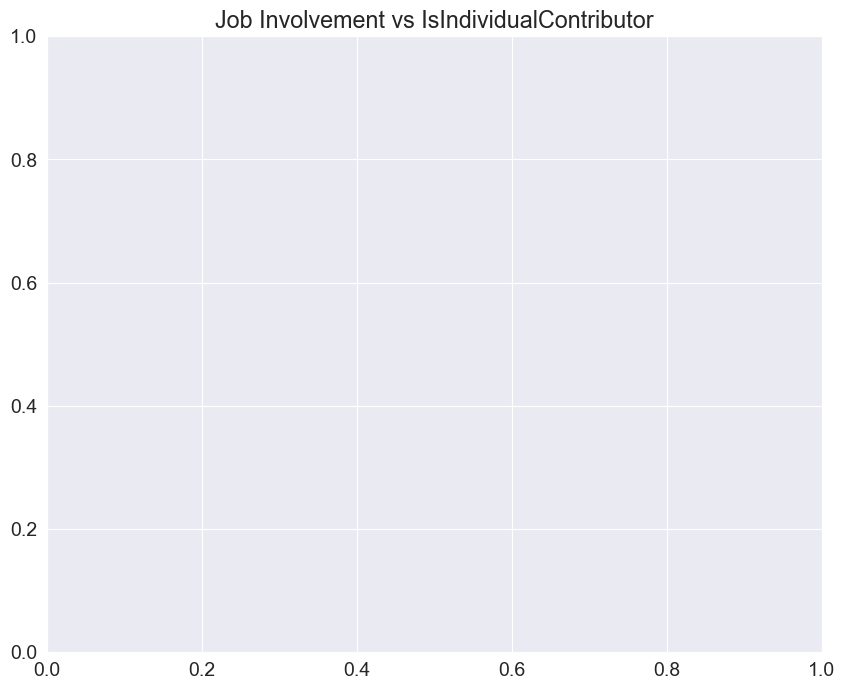

In [23]:
m.figure(figsize=(10,8))
m.title('Job Involvement vs IsIndividualContributor')
s.boxplot(train_raw.IsIndividualContributor, train_raw.JobInvolvement, hue=train_raw.Target)

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\2298872258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsSinceLastPromotion'])


<Axes: xlabel='YearsSinceLastPromotion', ylabel='Density'>

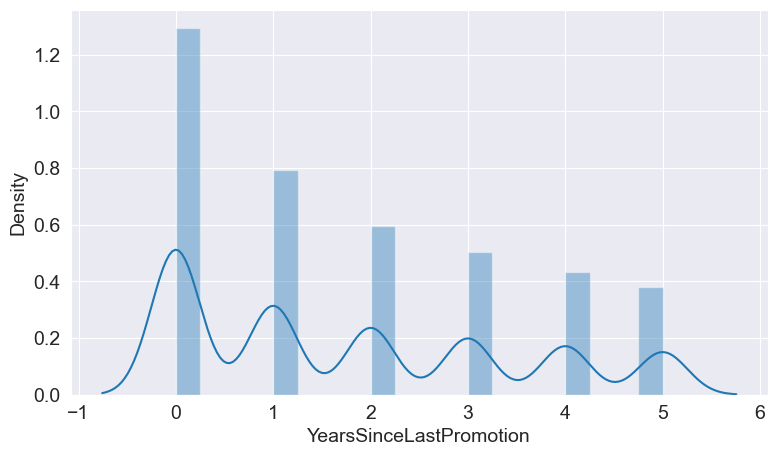

In [24]:
s.distplot(df['YearsSinceLastPromotion'])

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\1680970430.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s.distplot(df['YearsWithCurrManager'])


<Axes: xlabel='YearsWithCurrManager', ylabel='Density'>

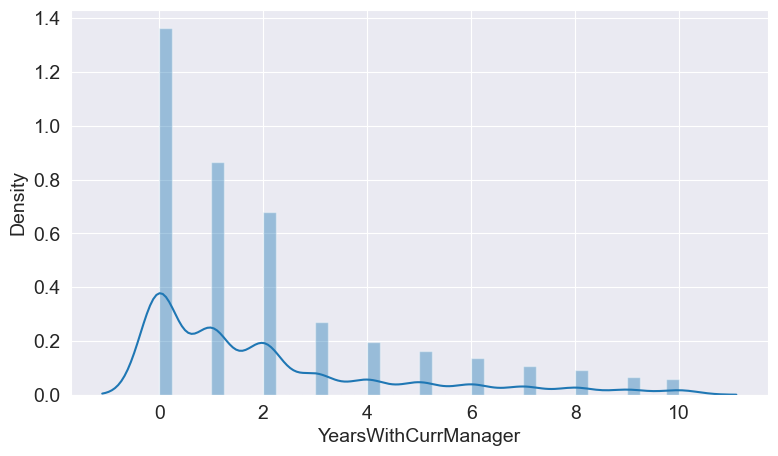

In [25]:
s.distplot(df['YearsWithCurrManager'])

## Defining Utility Functions

In [39]:
def Data_Processor(temp_frame):
    
    from sklearn.preprocessing import LabelEncoder
    label_encoder = LabelEncoder()
    temp = pd.DataFrame()
    temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings']) 
    temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor']) 
    temp_frame['RemoteWorkSatistfaction']= label_encoder.fit_transform(temp_frame['RemoteWorkSatistfaction']) 
    temp_frame['WorkLoadLevel']= label_encoder.fit_transform(temp_frame['WorkLoadLevel']) 
    temp = pd.concat([pd.get_dummies(temp_frame[col]) for col in ['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus']], axis=1)
    temp.groupby(level=0, axis=1).sum()
    temp_frame = pd.concat([temp_frame, temp], axis=1)
    temp_frame.drop(['Department','EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'EmployeeID'], axis=1, inplace=True)

    return temp_frame;

In [40]:
def Normalize(df):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    frame = pd.DataFrame();
    frame = df
    frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']] = scaler.fit_transform(frame.loc[:, ['Age', 'AvgDailyHours','LeavesTaken', 'MonthlyIncome', 
           'PercentSalaryHike', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']]);
    return frame;

In [41]:
df = Data_Processor(df)

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\864107174.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_frame['HasFlexibleTimings']= label_encoder.fit_transform(temp_frame['HasFlexibleTimings'])
C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\864107174.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_frame['IsIndividualContributor']= label_encoder.fit_transform(temp_frame['IsIndividualContributor'])
C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\864107174.py:8: SettingWithCop

In [42]:
df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,-0.242771,-0.727341,5,0,1,1,2,-0.606832,3.0,...,False,False,True,False,False,False,False,True,False,False
1,0,-1.212807,0.390193,5,0,1,1,4,-0.297836,4.0,...,False,False,False,False,False,False,True,False,True,False
2,0,0.484755,-0.463096,2,0,1,3,4,2.019630,4.0,...,False,False,True,False,False,False,False,False,True,False
4,0,-0.727789,-0.259408,3,0,1,2,4,-0.297836,5.0,...,False,False,False,False,False,False,False,False,False,True
5,0,-0.646953,1.656365,2,1,1,4,4,0.011159,3.0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,-1.212807,-0.248398,2,0,0,4,4,1.092644,1.0,...,False,False,True,False,False,False,False,False,True,False
15996,0,1.373954,-0.094255,2,0,0,2,3,0.474653,2.0,...,False,False,False,False,False,True,False,False,False,True
15997,0,-1.051134,-0.688805,1,0,1,4,4,-0.606832,2.0,...,False,False,False,False,True,False,False,False,False,True
15998,0,-0.808625,-0.914514,4,1,0,4,2,-0.452334,2.0,...,False,False,False,False,False,False,False,False,True,False


In [43]:
norm_df = Normalize(df)

In [44]:
norm_df

,Target,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
0,0,-0.242771,-0.727341,5,0,1,1,2,-0.606832,3.0,...,False,False,True,False,False,False,False,True,False,False
1,0,-1.212807,0.390193,5,0,1,1,4,-0.297836,4.0,...,False,False,False,False,False,False,True,False,True,False
2,0,0.484755,-0.463096,2,0,1,3,4,2.019630,4.0,...,False,False,True,False,False,False,False,False,True,False
4,0,-0.727789,-0.259408,3,0,1,2,4,-0.297836,5.0,...,False,False,False,False,False,False,False,False,False,True
5,0,-0.646953,1.656365,2,1,1,4,4,0.011159,3.0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15994,0,-1.212807,-0.248398,2,0,0,4,4,1.092644,1.0,...,False,False,True,False,False,False,False,False,True,False
15996,0,1.373954,-0.094255,2,0,0,2,3,0.474653,2.0,...,False,False,False,False,False,True,False,False,False,True
15997,0,-1.051134,-0.688805,1,0,1,4,4,-0.606832,2.0,...,False,False,False,False,True,False,False,False,False,True
15998,0,-0.808625,-0.914514,4,1,0,4,2,-0.452334,2.0,...,False,False,False,False,False,False,False,False,True,False


In [45]:
norm_df['Target'].value_counts()

Target
0    11145
1     2409
Name: count, dtype: int64

In [46]:
norm_df.columns

Index(['Target', 'Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single'],
      dtype='object')

In [47]:
from sklearn.utils import resample
# Separate majority and minority classes
df_1 = norm_df[norm_df['Target']==0 ]
df_2 = norm_df[norm_df['Target']==1]

 
# Downsample majority class and upsample the minority class
df_11 = resample(df_1, replace=True,n_samples=5500,random_state=123) 
df_22 = resample(df_2, replace=True,n_samples=5500,random_state=123)

 
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_11,df_22])
 
# Display new class counts
df_upsampled['Target'].value_counts()

Target
0    5500
1    5500
Name: count, dtype: int64

In [48]:
# shuffle the DataFrame rows 
data= df_upsampled.sample(frac = 1)

In [49]:
X = data[['Age', 'AvgDailyHours', 'Education', 'HasFlexibleTimings',
       'IsIndividualContributor', 'JobInvolvement', 'JobSatisfaction',
       'LeavesTaken', 'MicromanagedAtWork', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'RemoteWorkSatistfaction',
       'SelfMotivationLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'WorkLoadLevel', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Human Resources',
       'Research & Development', 'Sales', 'Human Resources', 'Life Sciences',
       'Marketing', 'Medical', 'Other', 'Technical Degree', 'Female', 'Male',
       'Healthcare Representative', 'Human Resources', 'Laboratory Technician',
       'Manager', 'Manufacturing Director', 'Research Director',
       'Research Scientist', 'Sales Executive', 'Sales Representative',
       'Divorced', 'Married', 'Single']]

y = data['Target']

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=40)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (8800, 52) (8800,)
Test set: (2200, 52) (2200,)


In [51]:
x_train

,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
3392,-0.000262,0.665448,3,0,0,4,3,-0.452334,2.0,-0.313340,...,False,False,False,False,True,False,False,True,False,False
1771,-0.727789,-0.430066,2,0,0,4,4,0.629150,3.0,-0.178447,...,False,False,True,False,False,False,False,False,False,True
8338,0.161410,-0.391530,4,0,1,1,2,-0.143338,3.0,0.177183,...,False,False,False,False,False,False,False,False,True,False
3610,-0.081099,1.606819,5,1,1,1,1,0.938146,5.0,-0.104869,...,False,False,False,True,False,False,False,True,False,False
12299,0.888937,-0.072235,3,0,1,3,3,-1.224823,5.0,0.177183,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.969773,0.120444,5,0,0,2,1,0.629150,3.0,0.140393,...,False,False,False,False,True,False,False,True,False,False
12272,-0.000262,1.612324,4,0,0,3,3,-1.379320,5.0,-0.227499,...,False,False,False,False,False,False,False,False,False,True
2142,-0.323608,-0.143801,2,0,0,3,2,-1.224823,3.0,-0.325604,...,False,False,False,True,False,False,False,False,True,False
7508,0.808100,-0.925524,2,1,0,3,3,1.247141,3.0,-0.031290,...,False,False,True,False,False,False,False,True,False,False


In [52]:
x_test

,Age,AvgDailyHours,Education,HasFlexibleTimings,IsIndividualContributor,JobInvolvement,JobSatisfaction,LeavesTaken,MicromanagedAtWork,MonthlyIncome,...,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative,Divorced,Married,Single
1553,0.080574,-0.408046,2,1,1,1,4,-0.915827,3.0,0.042288,...,False,False,False,False,False,False,False,False,False,True
15737,-1.536152,-0.149306,2,1,0,3,4,-1.070325,5.0,-0.301078,...,False,False,False,True,False,False,False,True,False,False
13932,0.161410,-0.033699,4,0,0,1,1,1.401639,5.0,0.226235,...,False,False,False,False,False,False,False,True,False,False
14411,1.293118,-0.864968,2,0,0,4,1,-1.379320,1.0,-0.190710,...,False,False,False,False,False,False,False,True,False,False
3920,0.403919,1.766467,2,0,1,1,3,0.320155,1.0,0.005499,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,1.293118,0.114938,2,0,0,3,2,2.792119,5.0,0.312077,...,False,False,False,True,False,False,False,True,False,False
9497,1.212282,-0.639259,2,0,1,2,2,-0.606832,4.0,-0.019026,...,True,False,False,False,False,False,False,False,True,False
11409,-0.404444,0.197515,2,0,1,1,1,1.247141,4.0,-0.055816,...,False,False,False,True,False,False,False,False,False,True
3094,-0.404444,1.452676,3,0,1,2,2,0.629150,5.0,-0.043553,...,False,False,True,False,False,False,False,False,False,True


In [53]:
x_test.to_csv('stress_test.csv',index=False)

In [54]:
y_train

3392     0
1771     0
8338     1
3610     1
12299    0
        ..
654      1
12272    1
2142     0
7508     1
15587    0
Name: Target, Length: 8800, dtype: int64

In [55]:
y_test

1553     0
15737    1
13932    1
14411    0
3920     1
        ..
5777     1
9497     0
11409    1
3094     0
10143    0
Name: Target, Length: 2200, dtype: int64

## RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV

dept = [1, 5, 10, 50, 100, 500, 1000]
n_estimators =  [20, 40, 60, 80, 100, 120]


param_grid={'n_estimators':n_estimators , 'max_depth':dept}
clf = RandomForestClassifier()
model = GridSearchCV(clf,param_grid,scoring='accuracy',n_jobs=-1,cv=3)
model.fit(x_train,y_train)
print("optimal n_estimators",model.best_estimator_.n_estimators)
print("optimal max_depth",model.best_estimator_.max_depth)
optimal_n_estimators = model.best_estimator_.n_estimators
optimal_max_depth = model.best_estimator_.max_depth

optimal n_estimators 120
optimal max_depth 1000


***********************************
the accuracy on testing data 0.9340909090909091
the accuracy on training data 1.0
***********************************


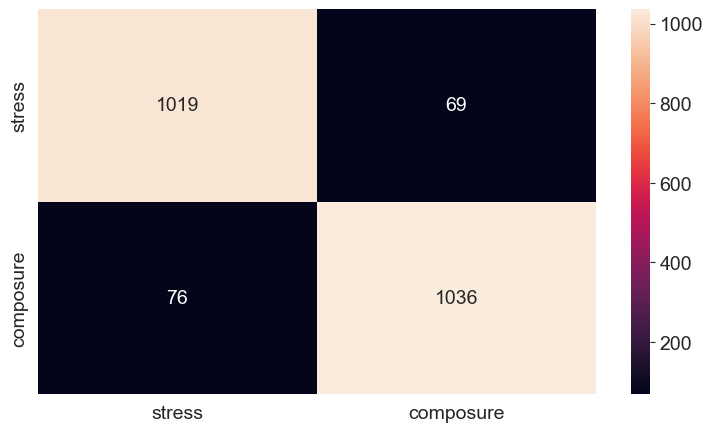

In [57]:
#Testing AUC on Test data
rf = RandomForestClassifier(criterion='gini',max_depth = optimal_max_depth,n_estimators =700)

rf.fit(x_train,y_train)

#predict on test data and train data
 
y_predtest = rf.predict(x_test)
y_predtrain = rf.predict(x_train)

print('*'*35)

#accuracy on training and testing data

print('the accuracy on testing data',accuracy_score(y_test,y_predtest))
print('the accuracy on training data',accuracy_score(y_train,y_predtrain))
train1 = accuracy_score(y_train,y_predtrain)
test1 = accuracy_score(y_test,y_predtest)

print('*'*35)


# Code for drawing seaborn heatmaps
class_names = ['stress', 'composure']
cm = pd.DataFrame(confusion_matrix(y_test, y_predtest.round()), index=class_names, columns=class_names )
fig = m.figure( )
heatmap = s.heatmap(cm, annot=True, fmt="d")

In [59]:
all_model_result = pd.DataFrame(columns=['Model Name', 'Classifier', 'Train Score', 'Test Score'])
new = ['Random Forest','RandomForestClassifier',train1, test1]
all_model_result.loc[1] = new

## K - Nearest Neighbours

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [61]:

ks = 10
error_rate = []

# Will take some time
for i in range(1,ks):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    yhatknn = knn.predict(x_test)
    error_rate.append(np.mean(yhatknn != y_test))

Text(0, 0.5, 'Error Rate')

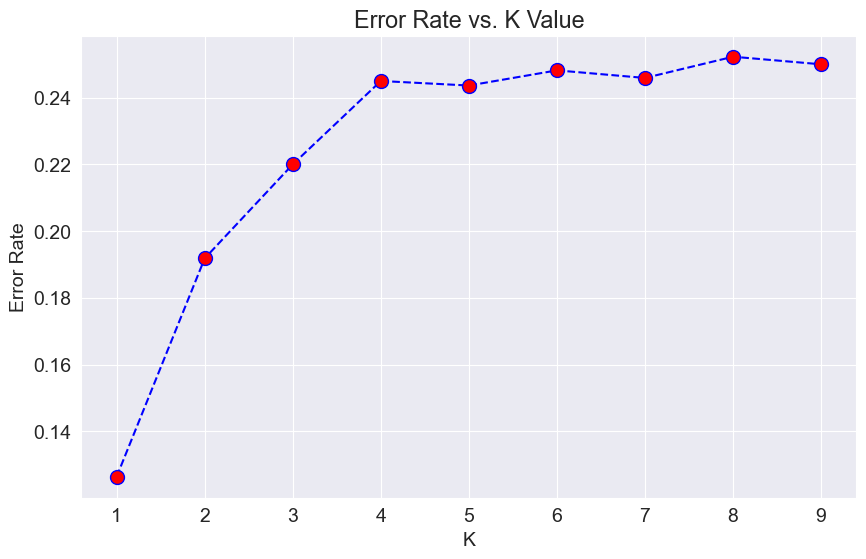

In [62]:
m.figure(figsize=(10,6))
m.plot(range(1,ks),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
m.title('Error Rate vs. K Value')
m.xlabel('K')
m.ylabel('Error Rate')

***********************************
the accuracy on testing data 0.7563636363636363
the accuracy on training data 0.8507954545454546
***********************************


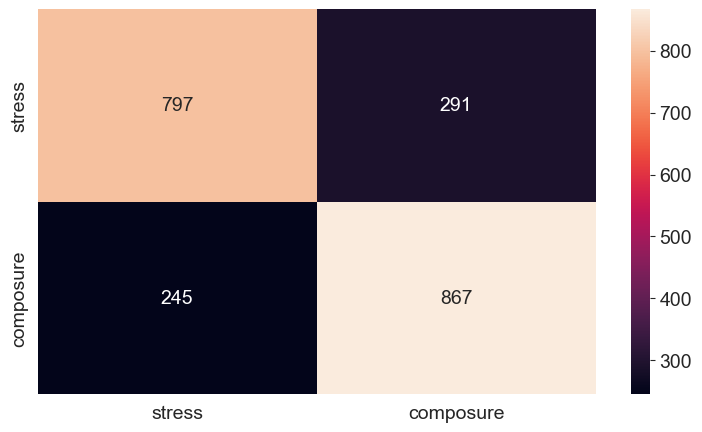

In [63]:
#Testing AUC on Test data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
#predict on test data and train data
 
y_predtest = knn.predict(x_test)
y_predtrain = knn.predict(x_train)

print('*'*35)

#accuracy on training and testing data

print('the accuracy on testing data',accuracy_score(y_test,y_predtest))
print('the accuracy on training data',accuracy_score(y_train,y_predtrain))
train2 = accuracy_score(y_train,y_predtrain)
test2 = accuracy_score(y_test,y_predtest)

print('*'*35)


# Code for drawing seaborn heatmaps
class_names = ['stress', 'composure']
cm = pd.DataFrame(confusion_matrix(y_test, y_predtest.round()), index=class_names, columns=class_names )
fig = m.figure( )
heatmap = s.heatmap(cm, annot=True, fmt="d")

In [64]:
new = ['KNN','K - Nearest NeighboursClassifier',train2, test2]
all_model_result.loc[2] = new

In [65]:
all_model_result

,Model Name,Classifier,Train Score,Test Score
1,Random Forest,RandomForestClassifier,1.000000,0.934091
2,KNN,K - Nearest NeighboursClassifier,0.850795,0.756364


In [69]:
Treatment={"stress":"Exercise takes employees' minds off the stress of their job to focus on the task at hand. It also improves moods by increasing the production of endorphins, the brain's feel-good neurotransmitters. Employees feel valued when they think you're looking out for their health!",
        "composure":" Employee was relaxed, Good Health for employee so no need for treatment"}

In [66]:
#predicted = rf.predict(X_test[:20])
predicted = rf.predict(x_test[:20])

In [67]:
predicted

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [70]:
pred=[]
orginal=[]
tret=[]
for i in predicted:
  classn=class_names[predicted[i]]
  org=class_names[int(y_test[i:i+1])]
  tretment=Treatment[classn]
  pred.append(classn)
  orginal.append(org)
  tret.append(tretment)

C:\Users\ST-0010\AppData\Local\Temp\ipykernel_10888\2677155901.py:6: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  org=class_names[int(y_test[i:i+1])]


In [71]:
# Creating a data frame
df1 = pd.DataFrame(list(zip(orginal, pred, tret)), 
               columns =['original_Classlabel', 'predicted_classlebel','Treatment_For_employees'])

In [72]:
df1 

,original_Classlabel,predicted_classlebel,Treatment_For_employees
0,stress,stress,Exercise takes employees' minds off the stress...
1,composure,composure,"Employee was relaxed, Good Health for employe..."
2,composure,composure,"Employee was relaxed, Good Health for employe..."
3,stress,stress,Exercise takes employees' minds off the stress...
4,composure,composure,"Employee was relaxed, Good Health for employe..."
5,composure,composure,"Employee was relaxed, Good Health for employe..."
6,stress,stress,Exercise takes employees' minds off the stress...
7,stress,stress,Exercise takes employees' minds off the stress...
8,composure,composure,"Employee was relaxed, Good Health for employe..."
9,composure,composure,"Employee was relaxed, Good Health for employe..."


In [76]:
i=4
pred = rf.predict(x_test[:i])
classn=class_names[pred[i-1]]
print("prediction:{}".format(classn))
tre=Treatment[classn]
print("Treatment for {} is:\n{}".format(classn,tre))


prediction:stress
Treatment for stress is:
Exercise takes employees' minds off the stress of their job to focus on the task at hand. It also improves moods by increasing the production of endorphins, the brain's feel-good neurotransmitters. Employees feel valued when they think you're looking out for their health!
